In [33]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
bikes = gpd.read_file('LA_Bikes.zip')

In [3]:
bikes.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6375 non-null   int64   
 1   Network     3241 non-null   object  
 2   Bikeway     6375 non-null   object  
 3   Street      6363 non-null   object  
 4   From_       6321 non-null   object  
 5   To_         6317 non-null   object  
 6   Shape_Leng  6375 non-null   float64 
 7   Install_Da  6335 non-null   object  
 8   Region      5895 non-null   object  
 9   Bikeway_Ty  6375 non-null   object  
 10  Datasource  6375 non-null   object  
 11  geometry    6375 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(9)
memory usage: 597.8+ KB


/tmp/ipykernel_61/1105019264.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  bikes.info(verbose=True, null_counts=True)


<AxesSubplot:>

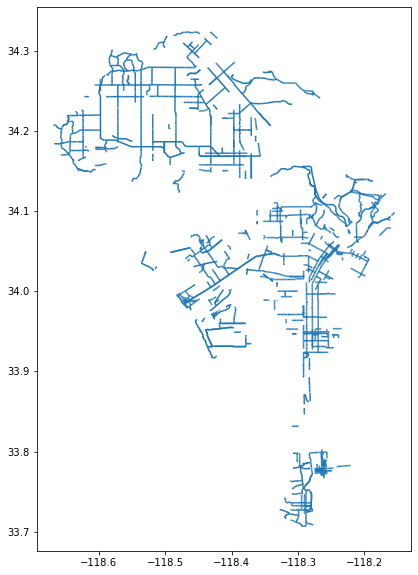

In [5]:
bikes.plot(figsize=(10,10))

In [8]:
types = bikes.Bikeway_Ty.value_counts()

In [9]:
types = types.reset_index()
types

,index,Bikeway_Ty
0,Lane,4461
1,Sharrowed Route,923
2,Route,704
3,Protected Bike Lane,152
4,Buffer Bike Lane,69
5,Path,48
6,Bicycle Friendly Street,11
7,Temp Removal Sharrowed Route,5
8,Detour Sharrowed Route,2


In [11]:
types.columns.to_list()

['index', 'Bikeway_Ty']

In [12]:
types.columns = ['Type', 'Count']
types

,Type,Count
0,Lane,4461
1,Sharrowed Route,923
2,Route,704
3,Protected Bike Lane,152
4,Buffer Bike Lane,69
5,Path,48
6,Bicycle Friendly Street,11
7,Temp Removal Sharrowed Route,5
8,Detour Sharrowed Route,2


<AxesSubplot:title={'center':'Number of Bikeway Types'}, xlabel='Type'>

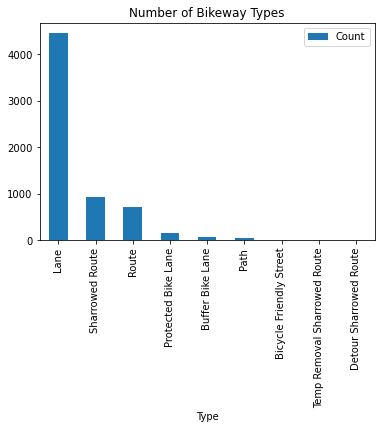

In [15]:
types.plot.bar(x = 'Type', y = 'Count', title = 'Number of Bikeway Types')

In [20]:
desired = ['Bikeway_Ty', 'geometry']
bikes[desired].sample(10)

,Bikeway_Ty,geometry
3189,Route,"LINESTRING Z (-118.33489 34.01461 0.00000, -11..."
5888,Lane,"LINESTRING Z (-118.34503 34.04610 0.00000, -11..."
1081,Lane,"LINESTRING Z (-118.37032 34.20120 0.00000, -11..."
4343,Lane,"LINESTRING Z (-118.46635 34.32317 0.00000, -11..."
5539,Sharrowed Route,"LINESTRING Z (-118.28847 34.06678 0.00000, -11..."
1468,Sharrowed Route,"LINESTRING Z (-118.45291 34.04666 0.00000, -11..."
38,Route,"LINESTRING Z (-118.28578 33.72515 0.00000, -11..."
1167,Lane,"LINESTRING Z (-118.53622 34.28686 0.00000, -11..."
1693,Lane,"LINESTRING Z (-118.40693 34.26921 0.00000, -11..."
439,Lane,"LINESTRING Z (-118.25815 34.03909 0.00000, -11..."


In [21]:
bikes_bytype = bikes[desired].copy()

In [47]:
bikes_bytype = bikes_bytype.to_crs(epsg=3857)

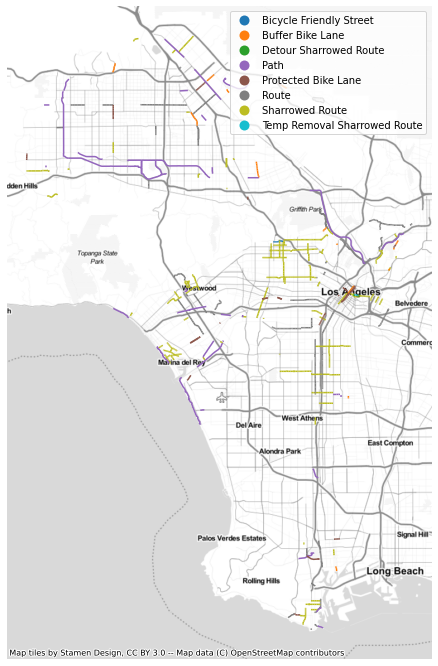

In [56]:
ax = bikes_bytype.loc[bikes_bytype.Bikeway_Ty != 'Lane'].plot(
            figsize=(20,12),   #size of the plot
            column = 'Bikeway_Ty',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }
)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()